# Parcial de Segundo Corte Academico: TripAdvisor 2010 - 2020.
Ing. Luis Felipe Narvaez Gomez. E-mail: luis.narvaez@usantoto.edu.co. Cod: 2312660. Facultad de Ingenieria de Sistemas. USTA.

## Descripcion

**Descripción de la data:** La colección fue extraída por un turista que viajó a los lugares más representativos de Nayarit, México. Esta colección se obtuvo de los turistas que compartieron su satisfacción en TripAdvisor entre 2010 y 2020. Cada clase de satisfacción es un número entero entre [1, 5], donde 1 representa la satisfacción más negativa y 5 la más positiva

**DATASET 1.**

**Datos del usuario (data_training.csv):** Género (Masculino o Femenino) y lugar de procedencia. Se tomó en cuenta el estado de origen si el turista es mexicano, en caso contrario tendrá la etiqueta de 'extranjero'. La descripción que el mismo usuario puso en TripAdvisor (Algunos usuarios no comparten descripción) y opiniones que ha puesto de otros lugares (no necesariamente mexicanos) en TripAdvisor.

1. Index: Es el índice de cada recomendación. Tipo de dato: Texto
2. Gender:  El género del turista. Tipo de dato: [Male, Female, N/I] (N/I = Not Information)
3. Place: El lugar turístico que se le recomienda al turista visitar. Tipo de dato: Texto.
4. Location: El lugar de origen del turista (las regiones de centro, noreste, noroeste, occidente, y sureste se refieren a las regiones de México). Tipo de dato: Texto
5. Date:  Fecha en la que se emitió la recomendación. Tipo de dato: Fecha
6. Type: Tipo de viaje que haría el turista. Tipo de dato: [Family, Friends, Alone, Couple, Business]
7. Label: La etiqueta que representa el nivel de satisfacción que tendrá el turista al ir al lugar recomendado. Tipo de dato: [1, 2 ,3 ,4 ,5]

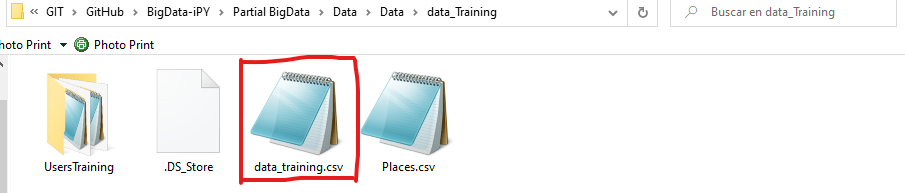

**DATASET 2.**

**Información del lugar (Places.csv):** Una breve descripción en texto del lugar y una serie de características representativas del lugar como tipo de turismo que se puede realizar allí (aventura, playa, relax, etc.), si es un ambiente familiar, si es privado o público, es gratuito o pagado, entre otros.

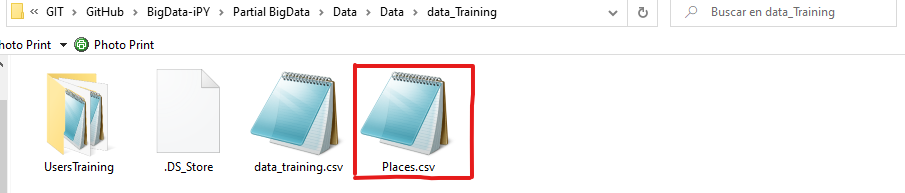

**DATASET 3.**

**UsersTraining** La carpeta contiene 1351 archivos, cada archivo fue nombrado como 'UsuarioN.csv' donde UsuarioN es el índice para que se pueda identificar dentro del archivo  rest-mex_2022_recomendation_data_training.csv. Cada archivo csv tiene una lista del historial de opiniones que ha dado el UsuarioN en TripAdvisor. Estos datos están organizados en 4 columnas donde en cada renglón se puede encontrar la siguiente información:

1. Columna 1: El comentario que el turista otorgó (desconocido = comentario en blanco)
2. Columna 2: El nivel de satisfacción que tuvo el UsuarioN
3. Columna 3: El lugar que el turista visitó (Este lugar puede ser de cualquier parte del mundo, no necesariamente de México)
4. Columna 4: La calificación global que tiene ese lugar en el sitio TripAdvisor

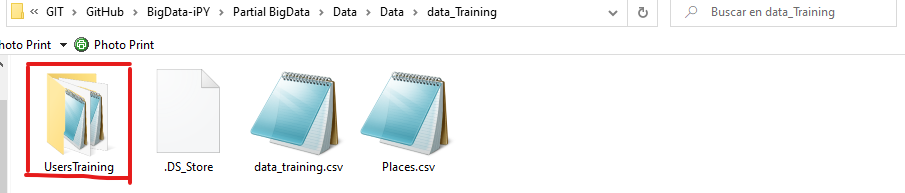
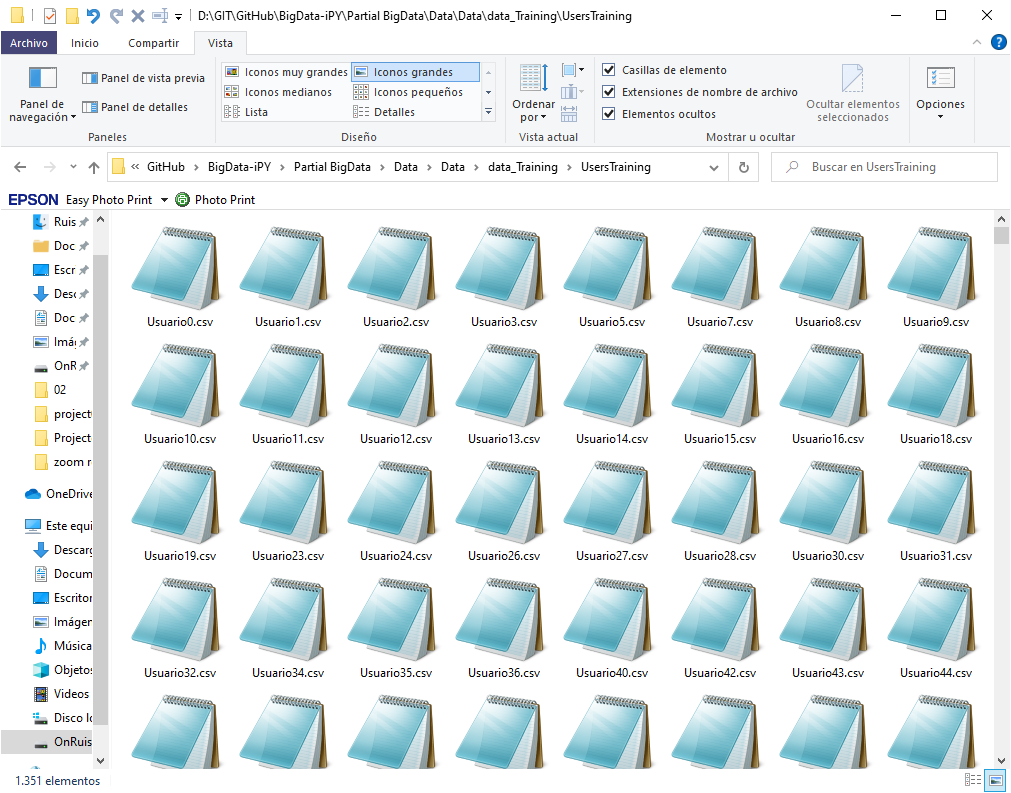


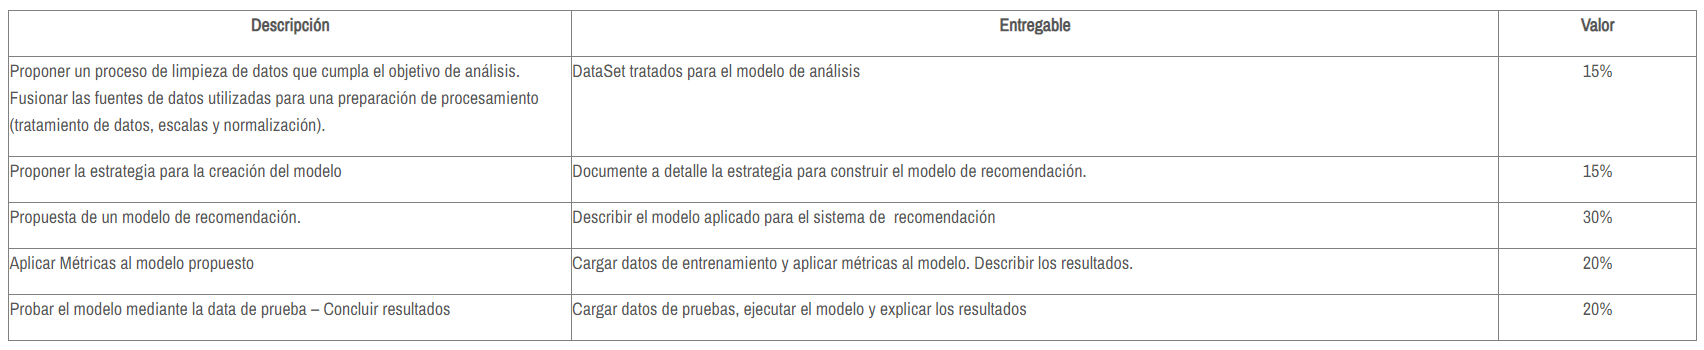

## Librerias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from IPython.display import Image
import matplotlib.pyplot as plt
import plotly.express as px

## Metodos

In [2]:
def information(df_dataset):
    print("\n\n Nombres de las columnas del Dataframe: \n\n",df_dataset.keys())
    print(f"\n\n Cantidad de Filas y Columnas de este daframe: {df_dataset.shape}")
    print("\n\n Tipos de datos que encontramos en el dataset: \n\n", df_dataset.dtypes)
    print("\n\n Informacion extra: \n\n",df_dataset.info())

In [56]:
def get_corpus_Platz(df_dataset):
    corpus_temp = []
    for i in range(df_dataset.shape[0]):
        corpus_temp.append( df_dataset.at[ df_dataset.index.values[i], 'Platz'] )
    
    return corpus_temp

In [103]:
def get_corpus_general(df_dataset,name):
    corpus_temp = []
    for i in range(df_dataset.shape[0]):
        corpus_temp.append( df_dataset.at[ df_dataset.index.values[i], name] )
    
    return corpus_temp

In [59]:
def to_lower(corpus_aja):
    corpus_temp = []
    for i in range(len(corpus_aja)):
        corpus_temp.append( corpus_aja[i].lower() )
    
    return corpus_temp

In [142]:
def clean_characters(my_paragraph):
    # Me aseguro por segunda vez que estoy tratando con solo minusculas
    my_paragraph = my_paragraph.lower()
    # primero las vocales con tilde o cosas raras que no deberia tener una vocal en ingles
    my_paragraph = my_paragraph.replace('á','a')
    my_paragraph = my_paragraph.replace('é','e')
    my_paragraph = my_paragraph.replace('í','i')
    my_paragraph = my_paragraph.replace('ó','o')
    my_paragraph = my_paragraph.replace('ú','u')
    my_paragraph = my_paragraph.replace('â','a')
    # los caracteres
    my_paragraph = my_paragraph.replace(',','')
    my_paragraph = my_paragraph.replace(';','')
    my_paragraph = my_paragraph.replace(':','')
    my_paragraph = my_paragraph.replace('.','')
    my_paragraph = my_paragraph.replace('¨','')
    my_paragraph = my_paragraph.replace('´','')
    my_paragraph = my_paragraph.replace('{','')
    my_paragraph = my_paragraph.replace('}','')
    my_paragraph = my_paragraph.replace('[','')
    my_paragraph = my_paragraph.replace(']','')
    my_paragraph = my_paragraph.replace('^','')
    my_paragraph = my_paragraph.replace('`','')
    my_paragraph = my_paragraph.replace('*','')
    my_paragraph = my_paragraph.replace('~','')
    my_paragraph = my_paragraph.replace('+','')
    my_paragraph = my_paragraph.replace('?','')
    my_paragraph = my_paragraph.replace('str(\)','')
    my_paragraph = my_paragraph.replace('¿','')
    my_paragraph = my_paragraph.replace('¡','')
    my_paragraph = my_paragraph.replace('|',' ')
    my_paragraph = my_paragraph.replace('°','')
    my_paragraph = my_paragraph.replace('¬','')
    my_paragraph = my_paragraph.replace('!','')
    my_paragraph = my_paragraph.replace('"','')
    my_paragraph = my_paragraph.replace('#','')
    my_paragraph = my_paragraph.replace('$','')
    my_paragraph = my_paragraph.replace('%','')
    my_paragraph = my_paragraph.replace('&','')
    my_paragraph = my_paragraph.replace('/','')
    my_paragraph = my_paragraph.replace('(','')
    my_paragraph = my_paragraph.replace(')','')
    my_paragraph = my_paragraph.replace('=','')
    my_paragraph = my_paragraph.replace('@','')
    # Eliminar numeros
    my_paragraph = my_paragraph.replace('1','')
    my_paragraph = my_paragraph.replace('2','')
    my_paragraph = my_paragraph.replace('3','')
    my_paragraph = my_paragraph.replace('4','')
    my_paragraph = my_paragraph.replace('5','')
    my_paragraph = my_paragraph.replace('6','')
    my_paragraph = my_paragraph.replace('7','')
    my_paragraph = my_paragraph.replace('8','')
    my_paragraph = my_paragraph.replace('9','')
    my_paragraph = my_paragraph.replace('0','')
    # Espacios y otros caracteres mas extraños
    my_paragraph = my_paragraph.replace('“','')
    my_paragraph = my_paragraph.replace('  ','')
    my_paragraph = my_paragraph.replace('”','')
    my_paragraph = my_paragraph.replace('\n\n','')
    my_paragraph = my_paragraph.replace('\n','')
    #simbolos de dinero
    my_paragraph = my_paragraph.replace('£','')
    my_paragraph = my_paragraph.replace('€','')
    my_paragraph = my_paragraph.replace('¥','')
    my_paragraph = my_paragraph.replace('元','')
    my_paragraph = my_paragraph.replace('₩','')
    my_paragraph = my_paragraph.replace('₹','')
    my_paragraph = my_paragraph.replace('₽','')
    my_paragraph = my_paragraph.replace('₺','')
    my_paragraph = my_paragraph.replace('ł','')
    my_paragraph = my_paragraph.replace('č','')
    my_paragraph = my_paragraph.replace('₪','')
    my_paragraph = my_paragraph.replace('₱','')
    
    return my_paragraph

In [156]:
def malicia(my_paragraph, malicia_indigena):
    
    if my_paragraph.find(malicia_indigena[0])
    my_paragraph = my_paragraph.replace(malicia_indigena[0],'')
    my_paragraph = my_paragraph.replace(malicia_indigena[1],'')
    my_paragraph = my_paragraph.replace(malicia_indigena[2],'')
    
    return my_paragraph

In [153]:
# podria llamarse dream_works :v 
def clean_works(my_paragraph, json):
    longitud_data = int(len(my_paragraph))
    longitud_json = int(len(json))
    
    # quita palabras con el diccionario
    buscar = json
    sustituir = ''
    for i in range(longitud_data):
        for j in range(longitud_json):
            if my_paragraph[i] == buscar[j]:
                my_paragraph[i] = sustituir
    
    #crea un arreglo nuevo para quitar los elementos vacios
    my_paragraph_2 =[]
    for val in my_paragraph: 
        if val != '' : 
            my_paragraph_2.append(val) 
                
    return my_paragraph_2

In [154]:
def clean_works_machetazo(my_paragraph, json):
    corpus_temp = []
    for i in range(len(my_paragraph)):
        for w in range(len(json)):
            corpus_temp.append( my_paragraph[i].replace( json[w],'' ) )
    return corpus_temp

In [266]:
def etiquetas(corpus_stamp, malicia_indigena):
    corpus_cadena = []
    mensaje = ''
    for w in range(len(corpus_stamp)):
        
        cadena = corpus_stamp[w]

        for i in range (len(cadena)):
            if malicia_indigena[0] in cadena[i]:
                cadena[i] = ''
            elif malicia_indigena[1] in cadena[i]:
                cadena[i] = ''
            elif malicia_indigena[2] in cadena[i]:
                cadena[i] = ''                
        
        #for i in range (len(cadena)):
            #mensaje = mensaje + cadena[i]
        #corpus_cadena.append(mensaje)
        
        for i in range(len(cadena)):
            if cadena[i] != '':
                corpus_cadena.append(cadena[i])
        
    
    return corpus_cadena

## Ruta Madre de los Datasets

Primero sera establecer la ruta madre de archivos para importar los datasets que vamos a utilizar

In [3]:
mother_route = "./Data/Data/data_Training"

Empecemos con el primer dataset a ver que tiene y como lo podemos tratar para el ejercicio.

## Dataset 1 (data_training.csv)

### Ruta

In [4]:
# El nombre de este archivo seria ...

data_training = '/data_training.csv'

### Lectura

In [5]:
# Para leer el dataset tendriamos
df_one = pd.read_csv(mother_route+data_training)

In [6]:
df_one.head(3)

,Index,Gender,Place,Location,Date,Type,Label
0,Usuario1221,Male,Islas Marietas,Occidente,diciembre de 2013,Family,5
1,Usuario4,Female,Bahia de Matanchen,Centro,abril de 2019,Friends,5
2,Usuario9,Male,Bahia de Matanchen,Noreste,diciembre de 2014,Family,5


### Informacion del Dataset

In [7]:
information(df_one)



 Nombres de las columnas del Dataframe: 

 Index(['Index', 'Gender', 'Place', 'Location', 'Date', 'Type', 'Label'], dtype='object')


 Cantidad de Filas y Columnas de este daframe: (1582, 7)


 Tipos de datos que encontramos en el dataset: 

 Index       object
Gender      object
Place       object
Location    object
Date        object
Type        object
Label        int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582 entries, 0 to 1581
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Index     1582 non-null   object
 1   Gender    1582 non-null   object
 2   Place     1582 non-null   object
 3   Location  1582 non-null   object
 4   Date      1582 non-null   object
 5   Type      1582 non-null   object
 6   Label     1582 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 86.6+ KB


 Informacion extra: 

 None


### Pasar tipos de datos a String (los necesarios)

In [8]:
# Los datos que tenemos son de tipo object, se transforaran a string para una posible futura transformacion y manejo de datos con menos problemas
df_one.keys()

Index(['Index', 'Gender', 'Place', 'Location', 'Date', 'Type', 'Label'], dtype='object')

In [9]:
df_one['Index']  = df_one['Index'].astype('string')
df_one['Gender']   = df_one['Gender'].astype('string')
df_one['Place']    = df_one['Place'].astype('string')
df_one['Location'] = df_one['Location'].astype('string')
df_one['Date']     = df_one['Date'].astype('string')
df_one['Type']     = df_one['Type'].astype('string')
df_one.dtypes

Index       string
Gender      string
Place       string
Location    string
Date        string
Type        string
Label        int64
dtype: object

In [10]:
df_one.head(3)

,Index,Gender,Place,Location,Date,Type,Label
0,Usuario1221,Male,Islas Marietas,Occidente,diciembre de 2013,Family,5
1,Usuario4,Female,Bahia de Matanchen,Centro,abril de 2019,Friends,5
2,Usuario9,Male,Bahia de Matanchen,Noreste,diciembre de 2014,Family,5


### Reorganizar desde el usuario 0 hasta el usuario n

Organicemos los usuarios desde el 0 hasta el de mayor numero

In [11]:
df_uno = df_one.copy()

In [12]:
df_uno = df_uno.rename( columns={'Index':'User'} )
df_uno.head(1)

,User,Gender,Place,Location,Date,Type,Label
0,Usuario1221,Male,Islas Marietas,Occidente,diciembre de 2013,Family,5


In [13]:
df_uno['User Code'] = df_uno['User']
df_uno.head(1)

,User,Gender,Place,Location,Date,Type,Label,User Code
0,Usuario1221,Male,Islas Marietas,Occidente,diciembre de 2013,Family,5,Usuario1221


In [14]:
corpus_code = []
for i in range(df_uno.shape[0]):
    corpus_code.append(df_uno.at[df_uno.index.values[i], 'User Code'])
print("\n\n El array de a columna es: ", corpus_code)



 El array de a columna es:  ['Usuario1221', 'Usuario4', 'Usuario9', 'Usuario870', 'Usuario616', 'Usuario2121', 'Usuario704', 'Usuario1079', 'Usuario1526', 'Usuario492', 'Usuario765', 'Usuario50', 'Usuario2151', 'Usuario1821', 'Usuario1178', 'Usuario1770', 'Usuario1748', 'Usuario1809', 'Usuario1413', 'Usuario2027', 'Usuario669', 'Usuario1910', 'Usuario849', 'Usuario544', 'Usuario591', 'Usuario46', 'Usuario647', 'Usuario821', 'Usuario105', 'Usuario624', 'Usuario243', 'Usuario1529', 'Usuario120', 'Usuario1117', 'Usuario489', 'Usuario268', 'Usuario2043', 'Usuario1098', 'Usuario1339', 'Usuario158', 'Usuario1238', 'Usuario1450', 'Usuario1356', 'Usuario1940', 'Usuario1676', 'Usuario1502', 'Usuario1161', 'Usuario1174', 'Usuario1162', 'Usuario1092', 'Usuario632', 'Usuario1142', 'Usuario1727', 'Usuario622', 'Usuario1260', 'Usuario1574', 'Usuario1731', 'Usuario1348', 'Usuario1926', 'Usuario1783', 'Usuario1152', 'Usuario130', 'Usuario1416', 'Usuario205', 'Usuario1631', 'Usuario1101', 'Usuario665

In [15]:
#Ahora si limpiemosla de la parte que no le interesa a esta columna 'Usuario'

array_temp = []
for i in range(len(corpus_code)):
    array_temp.append( corpus_code[i].replace('Usuario','') )

corpus_code.clear()
corpus_code = array_temp
print("\n\n La lista nueva seria: ", corpus_code)



 La lista nueva seria:  ['1221', '4', '9', '870', '616', '2121', '704', '1079', '1526', '492', '765', '50', '2151', '1821', '1178', '1770', '1748', '1809', '1413', '2027', '669', '1910', '849', '544', '591', '46', '647', '821', '105', '624', '243', '1529', '120', '1117', '489', '268', '2043', '1098', '1339', '158', '1238', '1450', '1356', '1940', '1676', '1502', '1161', '1174', '1162', '1092', '632', '1142', '1727', '622', '1260', '1574', '1731', '1348', '1926', '1783', '1152', '130', '1416', '205', '1631', '1101', '665', '1740', '575', '2240', '1889', '676', '1296', '1383', '2174', '1121', '1530', '1411', '406', '1391', '971', '249', '691', '522', '1379', '1275', '1845', '478', '1623', '1537', '551', '1086', '2208', '650', '1326', '1472', '1051', '415', '292', '2155', '1377', '1564', '180', '1091', '1517', '1758', '56', '1944', '946', '343', '535', '612', '1473', '1907', '659', '644', '582', '1772', '215', '1873', '2058', '1708', '1234', '1342', '1251', '1533', '1465', '1352', '145'

In [16]:
# Ahora podemos añadir esta lista a nuestro dataframe
df_uno.head(1)

,User,Gender,Place,Location,Date,Type,Label,User Code
0,Usuario1221,Male,Islas Marietas,Occidente,diciembre de 2013,Family,5,Usuario1221


In [17]:
# puesto que el orden de datos no se alterado, podemos agregar sin problemas los datos como corresponde a cada usuario.
df_uno['Code'] = corpus_code
df_uno.head(1)

,User,Gender,Place,Location,Date,Type,Label,User Code,Code
0,Usuario1221,Male,Islas Marietas,Occidente,diciembre de 2013,Family,5,Usuario1221,1221


In [18]:
df_uno = df_uno.drop ( ['User Code'], axis=1 )
df_uno.head(1)

,User,Gender,Place,Location,Date,Type,Label,Code
0,Usuario1221,Male,Islas Marietas,Occidente,diciembre de 2013,Family,5,1221


In [19]:
df_uno.dtypes

User        string
Gender      string
Place       string
Location    string
Date        string
Type        string
Label        int64
Code        object
dtype: object

In [20]:
df_uno['Code']     = df_uno['Code'].astype('float')

In [21]:
df_uno.dtypes

User         string
Gender       string
Place        string
Location     string
Date         string
Type         string
Label         int64
Code        float64
dtype: object

In [22]:
#Ahora reorganizamos por el codigo, de esta manera organizamos los usuarios y su data segun su codigo
df_uno = df_uno.sort_values('Code', ascending=True )
df_uno.head()

,User,Gender,Place,Location,Date,Type,Label,Code
246,Usuario0,Male,Playa Los Muertos,Alemania,abril de 2017,Couple,5,0.0
908,Usuario1,Female,Bahia de Matanchen,Canada,enero de 2012,Couple,4,1.0
707,Usuario2,Male,Bahia de Matanchen,Centro,mayo de 2018,Business,5,2.0
1352,Usuario3,Female,Bahia de Matanchen,Centro,junio de 2017,Friends,3,3.0
1,Usuario4,Female,Bahia de Matanchen,Centro,abril de 2019,Friends,5,4.0


In [23]:
# por ultimo resetear el indice para que coincida con el orden de los datos
df_uno.reset_index(inplace=True, drop=True)
df_uno.head()

,User,Gender,Place,Location,Date,Type,Label,Code
0,Usuario0,Male,Playa Los Muertos,Alemania,abril de 2017,Couple,5,0.0
1,Usuario1,Female,Bahia de Matanchen,Canada,enero de 2012,Couple,4,1.0
2,Usuario2,Male,Bahia de Matanchen,Centro,mayo de 2018,Business,5,2.0
3,Usuario3,Female,Bahia de Matanchen,Centro,junio de 2017,Friends,3,3.0
4,Usuario4,Female,Bahia de Matanchen,Centro,abril de 2019,Friends,5,4.0


In [24]:
df_uno.head()

,User,Gender,Place,Location,Date,Type,Label,Code
0,Usuario0,Male,Playa Los Muertos,Alemania,abril de 2017,Couple,5,0.0
1,Usuario1,Female,Bahia de Matanchen,Canada,enero de 2012,Couple,4,1.0
2,Usuario2,Male,Bahia de Matanchen,Centro,mayo de 2018,Business,5,2.0
3,Usuario3,Female,Bahia de Matanchen,Centro,junio de 2017,Friends,3,3.0
4,Usuario4,Female,Bahia de Matanchen,Centro,abril de 2019,Friends,5,4.0


In [25]:
df_one.head()

,Index,Gender,Place,Location,Date,Type,Label
0,Usuario1221,Male,Islas Marietas,Occidente,diciembre de 2013,Family,5
1,Usuario4,Female,Bahia de Matanchen,Centro,abril de 2019,Friends,5
2,Usuario9,Male,Bahia de Matanchen,Noreste,diciembre de 2014,Family,5
3,Usuario870,Male,Islas Marietas,Estados Unidos,diciembre de 2014,Alone,5
4,Usuario616,Female,Islas Marietas,Centro,julio de 2014,Couple,5


### Resultado final primer dataset

In [26]:
df_one = df_uno
df_one.head()

,User,Gender,Place,Location,Date,Type,Label,Code
0,Usuario0,Male,Playa Los Muertos,Alemania,abril de 2017,Couple,5,0.0
1,Usuario1,Female,Bahia de Matanchen,Canada,enero de 2012,Couple,4,1.0
2,Usuario2,Male,Bahia de Matanchen,Centro,mayo de 2018,Business,5,2.0
3,Usuario3,Female,Bahia de Matanchen,Centro,junio de 2017,Friends,3,3.0
4,Usuario4,Female,Bahia de Matanchen,Centro,abril de 2019,Friends,5,4.0


De ahora en adelante al llamar al dataframe del dataset 1 sera por **df_one**

## Dataset 2 (places.csv)

### Ruta

In [27]:
places = '/Places.csv'

### Lectura del dataset

In [28]:
df_two = pd.read_csv(mother_route+places)

In [30]:
df_two.head(df_two.shape[0])

,Lugar,Descripción,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Bahia de Matanchen,Turismo de sol y playa,Se localiza en el municipio de San Blas a 70.5...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Playa Los Muertos,Turismo de sol y playa,En Puerto Vallarta,cerca del Río Cuale,a unos metros del malecón,se encuentra esta playa,con una extensión de 2 kilómetros de largo. Es...,NaN,NaN,NaN
2,Bucerias Art Walk,cultural|diversion,Hogar de uno de los paseos artísticos más sing...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Centro Historico de Tepic,cultural|religioso,La capital del Estado de Nayarit,es una ciudad colonial que se encuentra rodead...,posee riquezas naturales y está llena de cultu...,NaN,NaN,NaN,NaN,NaN
4,Galerias Vallarta,diversion,En Galerías Vallarta contamos con todas las me...,Boutiques,Cine.,NaN,NaN,NaN,NaN,NaN
5,Isla de Coral,Turismo de sol y playa|ecoturismo,Localizada en el municipio de Compostela,Nayarit,en la conocida como Bahía de Jaltemba,la Isla del Coral semeja un acuario natural de...,tortugas,estrellas de mar,y peces multicolores.,NaN
6,Islas Marietas,Turismo de sol y playa|Aventura|ecoturismo,El Parque Nacional Islas Marietas,son dos islas deshabitadas cercanas a la costa...,de origen volcánico,está compuesto por la isla Larga y la isla Red...,NaN,NaN,NaN,NaN
7,Manantial La Tovara,Turismo de sol y playa|Aventura|ecoturismo,La Tovara es un manantial ubicado en el munici...,que da origen a un estanque natural de agua du...,y una fauna diversa que incluye cocodrilos,tortugas,jaguares,ocelotes,armadillos,y una gran variedad de aves y peces.
8,Mercado del Pueblo Sayulita,gastronomico,Desde 2009,el Mercado del Pueblo,el mercado de agricultores de Sayulita,celebra las maravillas de la región presentand...,NaN,NaN,NaN,NaN
9,Mexcaltitan,Naturaleza,Mexcaltitán es una localidad del municipio de ...,Nayarit (México). La localidad se asienta sobr...,mezcal,y titlán,"riqueza, abundancia.",NaN,NaN,NaN


### Informacion del dataset

In [31]:
information(df_two)



 Nombres de las columnas del Dataframe: 

 Index(['Lugar', 'Descripción', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')


 Cantidad de Filas y Columnas de este daframe: (18, 10)


 Tipos de datos que encontramos en el dataset: 

 Lugar          object
Descripción    object
Unnamed: 2     object
Unnamed: 3     object
Unnamed: 4     object
Unnamed: 5     object
Unnamed: 6     object
Unnamed: 7     object
Unnamed: 8     object
Unnamed: 9     object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Lugar        18 non-null     object
 1   Descripción  18 non-null     object
 2   Unnamed: 2   18 non-null     object
 3   Unnamed: 3   15 non-null     object
 4   Unnamed: 4   13 non-null     object
 5   Unnamed: 5   9 non-null      object
 6   Un

### Nota: Observacion

A simple vista podemos observar que el dataset 2 puede hacerse un merge con el dataset 1 entre las columnas:

DF_ONE [Place] =>**INNER JOIN**<= DF_TWO [Lugar]

Sin embargo para preparar lo datos para futuras operaciones se considera mejor tratarlos como Strings y no como Objects

### Cambiar datos a tipo String

In [32]:
df_two.keys()

Index(['Lugar', 'Descripción', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')

In [33]:
df_two.dtypes

Lugar          object
Descripción    object
Unnamed: 2     object
Unnamed: 3     object
Unnamed: 4     object
Unnamed: 5     object
Unnamed: 6     object
Unnamed: 7     object
Unnamed: 8     object
Unnamed: 9     object
dtype: object

In [34]:
df_two['Lugar']       = df_two['Lugar'].astype('string')
df_two['Descripción'] = df_two['Descripción'].astype('string')
df_two['Unnamed: 2']  = df_two['Unnamed: 2'].astype('string')
df_two['Unnamed: 3']  = df_two['Unnamed: 3'].astype('string')
df_two['Unnamed: 4']  = df_two['Unnamed: 4'].astype('string')
df_two['Unnamed: 5']  = df_two['Unnamed: 5'].astype('string')
df_two['Unnamed: 6']  = df_two['Unnamed: 6'].astype('string')
df_two['Unnamed: 7']  = df_two['Unnamed: 7'].astype('string')
df_two['Unnamed: 8']  = df_two['Unnamed: 8'].astype('string')
df_two['Unnamed: 9']  = df_two['Unnamed: 9'].astype('string')
df_two.dtypes

Lugar          string
Descripción    string
Unnamed: 2     string
Unnamed: 3     string
Unnamed: 4     string
Unnamed: 5     string
Unnamed: 6     string
Unnamed: 7     string
Unnamed: 8     string
Unnamed: 9     string
dtype: object

In [35]:
df_two.head(2)

,Lugar,Descripción,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Bahia de Matanchen,Turismo de sol y playa,Se localiza en el municipio de San Blas a 70.5...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,Playa Los Muertos,Turismo de sol y playa,En Puerto Vallarta,cerca del Río Cuale,a unos metros del malecón,se encuentra esta playa,con una extensión de 2 kilómetros de largo. Es...,<NA>,<NA>,<NA>


### Estado final del dataset 2

In [36]:
df_two.head()

,Lugar,Descripción,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Bahia de Matanchen,Turismo de sol y playa,Se localiza en el municipio de San Blas a 70.5...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,Playa Los Muertos,Turismo de sol y playa,En Puerto Vallarta,cerca del Río Cuale,a unos metros del malecón,se encuentra esta playa,con una extensión de 2 kilómetros de largo. Es...,<NA>,<NA>,<NA>
2,Bucerias Art Walk,cultural|diversion,Hogar de uno de los paseos artísticos más sing...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,Centro Historico de Tepic,cultural|religioso,La capital del Estado de Nayarit,es una ciudad colonial que se encuentra rodead...,posee riquezas naturales y está llena de cultu...,<NA>,<NA>,<NA>,<NA>,<NA>
4,Galerias Vallarta,diversion,En Galerías Vallarta contamos con todas las me...,Boutiques,Cine.,<NA>,<NA>,<NA>,<NA>,<NA>


## Unir Dataframe 1 y Dataframe 2

Con la observacion expuesta en el desarrollo de la preparacion del dataset 2, tenemos que el dataframe 1 y el 2 pueden unirse para completar la informacion de estudio de recomendacion mediante la columna en ambas tablas que se refieren al lugar turistico visitado por las personas.

Sin embargo antes de empezar a hacer una union de este tipo es nesesario preparar estas columnas entre si, limpiandolas de caracteres extraños y pasandolas a texto en todo minusculas o todo mayusculas par que se pueda hacer un buen INNER JOIN aludiendo al SQL clasico.

### Renombrar columna en comun

La columna que habla del lugar a visitar es 'Place', primero cambiaremos a un nombre en comun entre ambos datasets.

'Platz'

In [38]:
df_one.head(1)

,User,Gender,Place,Location,Date,Type,Label,Code
0,Usuario0,Male,Playa Los Muertos,Alemania,abril de 2017,Couple,5,0.0


In [39]:
df_one = df_one.rename( columns = {'Place':'Platz'} )

In [40]:
df_one.head(1)

,User,Gender,Platz,Location,Date,Type,Label,Code
0,Usuario0,Male,Playa Los Muertos,Alemania,abril de 2017,Couple,5,0.0


Ahora lo mismo pero con el dataframe 2

In [41]:
df_two.head(1)

,Lugar,Descripción,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Bahia de Matanchen,Turismo de sol y playa,Se localiza en el municipio de San Blas a 70.5...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [42]:
df_two = df_two.rename( columns = {'Lugar':'Platz'} ) 

In [43]:
df_two.head(1)

,Platz,Descripción,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Bahia de Matanchen,Turismo de sol y playa,Se localiza en el municipio de San Blas a 70.5...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


Listo ya tenemos columnas comunes mas facilmente identificables

### Eliminar columnas que no necesito (Dataset 2)

¿Porque eliminar informacion de aposta de un Dataset?

Responde a como interpreto el ejercicio, puesto que no utilizare los algoritmos propios de Recomendacion y el sistema del Coseno de Similitud, debido a limitaciones en el Hardware del dispositivo de computo donde se desarrolla este Notebook de IPython; decido apostar por un agrupamiento de usuarios segun su calificacion utilizando como metodo el Machine Learning clasico.

Bajo este punto de vista las columnas que bien pueden servir para coseno de similitud no me serviran para Machine Learning.

#### Eliminacion

In [44]:
df_two.head(1)

,Platz,Descripción,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Bahia de Matanchen,Turismo de sol y playa,Se localiza en el municipio de San Blas a 70.5...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [48]:
df_dos = df_two.copy()
df_dos.head(1)

,Platz,Descripción,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Bahia de Matanchen,Turismo de sol y playa,Se localiza en el municipio de San Blas a 70.5...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [49]:
for i in range(2, 10):
    df_dos = df_dos.drop( [f'Unnamed: {i}'], axis=1 )

In [50]:
df_dos.head(1)

,Platz,Descripción
0,Bahia de Matanchen,Turismo de sol y playa


#### Dataframe 2 Nuevo

In [52]:
df_two = df_dos
df_two.head(1)

,Platz,Descripción
0,Bahia de Matanchen,Turismo de sol y playa


### Dataset 1, pasar a minusculas

In [54]:
df_one.head(2)

,User,Gender,Platz,Location,Date,Type,Label,Code
0,Usuario0,Male,Playa Los Muertos,Alemania,abril de 2017,Couple,5,0.0
1,Usuario1,Female,Bahia de Matanchen,Canada,enero de 2012,Couple,4,1.0


In [53]:
df_uno = df_one.copy()

In [57]:
# corpus con todos los lugares
corpus_get_one_Platz = get_corpus_Platz(df_uno)

#### Corpus con mayusculas

In [58]:
print("La columna original tiene esta informacion: \n\n", corpus_get_one_Platz)

La columna original tiene esta informacion: 

 ['Playa Los Muertos', 'Bahia de Matanchen', 'Bahia de Matanchen', 'Bahia de Matanchen', 'Bahia de Matanchen', 'Bahia de Matanchen', 'Bahia de Matanchen', 'Bahia de Matanchen', 'Bahia de Matanchen', 'Bahia de Matanchen', 'Bahia de Matanchen', 'Bahia de Matanchen', 'Bahia de Matanchen', 'Bahia de Matanchen', 'Bahia de Matanchen', 'Bahia de Matanchen', 'Bahia de Matanchen', 'Bahia de Matanchen', 'Bahia de Matanchen', 'Bahia de Matanchen', 'Bahia de Matanchen', 'Bucerias Art Walk', 'Bucerias Art Walk', 'Bucerias Art Walk', 'Bucerias Art Walk', 'Bucerias Art Walk', 'Bucerias Art Walk', 'Bucerias Art Walk', 'Bucerias Art Walk', 'Bucerias Art Walk', 'Bucerias Art Walk', 'Bucerias Art Walk', 'Bucerias Art Walk', 'Bucerias Art Walk', 'Bucerias Art Walk', 'Bucerias Art Walk', 'Bucerias Art Walk', 'Bucerias Art Walk', 'Bucerias Art Walk', 'Bucerias Art Walk', 'Bucerias Art Walk', 'Bucerias Art Walk', 'Bucerias Art Walk', 'Bucerias Art Walk', 'Buceria

**Ahora Hay que pasar todo a minusculas**
#### Paso a minusculas

In [61]:
corpus_monda = to_lower(corpus_get_one_Platz)

#### Corpus con minusculas

In [62]:
print("corpus ahora en minusculas: \n\n", corpus_monda)

corpus ahora en minusculas: 

 ['playa los muertos', 'bahia de matanchen', 'bahia de matanchen', 'bahia de matanchen', 'bahia de matanchen', 'bahia de matanchen', 'bahia de matanchen', 'bahia de matanchen', 'bahia de matanchen', 'bahia de matanchen', 'bahia de matanchen', 'bahia de matanchen', 'bahia de matanchen', 'bahia de matanchen', 'bahia de matanchen', 'bahia de matanchen', 'bahia de matanchen', 'bahia de matanchen', 'bahia de matanchen', 'bahia de matanchen', 'bahia de matanchen', 'bucerias art walk', 'bucerias art walk', 'bucerias art walk', 'bucerias art walk', 'bucerias art walk', 'bucerias art walk', 'bucerias art walk', 'bucerias art walk', 'bucerias art walk', 'bucerias art walk', 'bucerias art walk', 'bucerias art walk', 'bucerias art walk', 'bucerias art walk', 'bucerias art walk', 'bucerias art walk', 'bucerias art walk', 'bucerias art walk', 'bucerias art walk', 'bucerias art walk', 'bucerias art walk', 'bucerias art walk', 'bucerias art walk', 'bucerias art walk', 'bu

#### Reintegrar al dataframe

In [63]:
df_uno.head(1)

,User,Gender,Platz,Location,Date,Type,Label,Code
0,Usuario0,Male,Playa Los Muertos,Alemania,abril de 2017,Couple,5,0.0


In [64]:
df_uno['Temp'] = corpus_monda

In [65]:
df_uno.head(1)

,User,Gender,Platz,Location,Date,Type,Label,Code,Temp
0,Usuario0,Male,Playa Los Muertos,Alemania,abril de 2017,Couple,5,0.0,playa los muertos


In [66]:
df_uno = df_uno.drop( ['Platz'],axis=1 )

In [67]:
df_uno.head(1)

,User,Gender,Location,Date,Type,Label,Code,Temp
0,Usuario0,Male,Alemania,abril de 2017,Couple,5,0.0,playa los muertos


In [68]:
df_uno = df_uno.rename( columns={'Temp':'Platz'} )

In [69]:
df_uno.head(1)

,User,Gender,Location,Date,Type,Label,Code,Platz
0,Usuario0,Male,Alemania,abril de 2017,Couple,5,0.0,playa los muertos


In [70]:
df_one = df_uno
df_one.head(1)

,User,Gender,Location,Date,Type,Label,Code,Platz
0,Usuario0,Male,Alemania,abril de 2017,Couple,5,0.0,playa los muertos


### Dataset 2, Pasar a minusculas

In [73]:
df_two.head(1)

,Platz,Descripción
0,Bahia de Matanchen,Turismo de sol y playa


In [74]:
df_dos = df_two.copy()

In [75]:
corpus_get_two_Platz = get_corpus_Platz(df_dos)
corpus_chamo = to_lower(corpus_get_two_Platz)
df_dos['Temp'] = corpus_chamo
df_dos = df_dos.drop( ['Platz'],axis=1 )
df_dos = df_dos.rename( columns={'Temp':'Platz'} )
df_two = df_dos
df_two.head(1)

,Descripción,Platz
0,Turismo de sol y playa,bahia de matanchen


### Contar lugares de cada dataframe

In [76]:
df_one.head(1)

,User,Gender,Location,Date,Type,Label,Code,Platz
0,Usuario0,Male,Alemania,abril de 2017,Couple,5,0.0,playa los muertos


In [83]:
df_one['Platz'].value_counts()

islas marietas                     839
playa los muertos                  148
the jazz foundation                142
playa destiladeras                  81
bucerias art walk                   64
manantial la tovara                 62
splash water park                   47
galerias vallarta                   41
isla de coral                       29
mercado del pueblo sayulita         29
cerro de la contaduria              24
bahia de matanchen                  20
santuario de cocodrilos el cora     20
playa el anclote                    19
isla isabel                          7
centro historico de tepic            7
mexcaltitan                          2
playa los ayala                      1
Name: Platz, dtype: int64

In [84]:
df_two.head(1)

,Descripción,Platz
0,Turismo de sol y playa,bahia de matanchen


In [85]:
df_two['Platz'].value_counts()

bahia de matanchen                 1
playa los muertos                  1
cerro de la contaduria             1
isla isabel                        1
the jazz foundation                1
splash water park                  1
playa los ayala                    1
playa el anclote                   1
playa destiladeras                 1
mexcaltitan                        1
mercado del pueblo sayulita        1
manantial la tovara                1
islas marietas                     1
isla de coral                      1
galerias vallarta                  1
centro historico de tepic          1
bucerias art walk                  1
santuario de cocodrilos el cora    1
Name: Platz, dtype: int64

Aqui podemos observar que existen 18 lugares para el dataframe 1 y 18 lugares para el dataframe 2, no necesariamente los lugares que hay en uno, estaran en el otro, sin embargo, tambien podemos decir que puede existir una descripcion posible para cada lugar que hay en el dataframe 1.

### Hay nulos? 

Primero aseguremonos de la canidad de nulos en cada Dataset

In [87]:
df_one.isnull().sum()

User        0
Gender      0
Location    0
Date        0
Type        0
Label       0
Code        0
Platz       0
dtype: int64

In [88]:
df_two.isnull().sum()

Descripción    0
Platz          0
dtype: int64

Listo! no tenemos nulos enlos datasets, podemos hacer un merge y un procedimiento con mas tranquilidad :"v

## MERGE

Aseguremonos que exista un tamaño conocido de nuestros datframes

In [89]:
print("\nCantidad de filas PRIMER DATASET: \n",df_one.shape[0])
print("\nCantidad de filas SEGUNDO DATASET: \n",df_two.shape[0])


Cantidad de filas PRIMER DATASET: 
 1582

Cantidad de filas SEGUNDO DATASET: 
 18


Ahora bien, tomaremos como principal el dataset 1 y como secundario el dataset 2, es decir, la logica que seguire es "añadir a mi principal caracteristicas del secundario para complementar la informacion"; esto es asi ya que es a caa lugar visitado por cada usuario poder añadirles la descripcion y no al contrario.

Para unir los dataset podemos recordar los tipos de uniones de el SQL clasico, pues con la libreria Pandas tenemos algo similar.
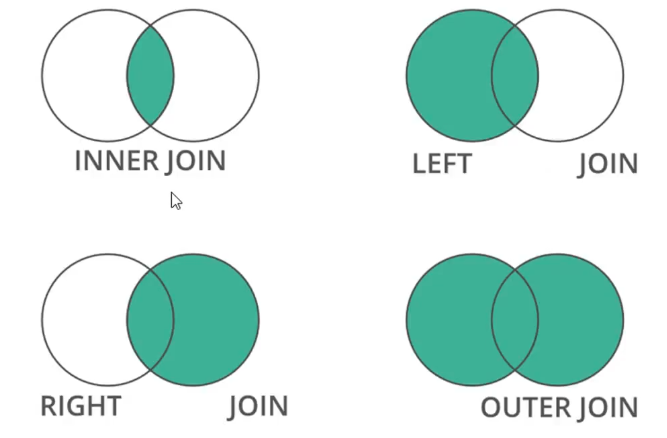

ImageReference: https://www.youtube.com/watch?v=mEmNiPoqKAo

In [90]:
print("\nColumnas de 1: ", df_one.keys() )
print("\nColumnas de 2: ", df_two.keys() )


Columnas de 1:  Index(['User', 'Gender', 'Location', 'Date', 'Type', 'Label', 'Code', 'Platz'], dtype='object')

Columnas de 2:  Index(['Descripción', 'Platz'], dtype='object')


In [91]:
df_union = pd.merge ( df_one, df_two, how="left", on="Platz")

In [92]:
print("\nTamaño de la union: ",df_union.shape[0] )


Tamaño de la union:  1582


In [94]:
df_union.head(df_union.shape[0])

,User,Gender,Location,Date,Type,Label,Code,Platz,Descripción
0,Usuario0,Male,Alemania,abril de 2017,Couple,5,0.0,playa los muertos,Turismo de sol y playa
1,Usuario1,Female,Canada,enero de 2012,Couple,4,1.0,bahia de matanchen,Turismo de sol y playa
2,Usuario2,Male,Centro,mayo de 2018,Business,5,2.0,bahia de matanchen,Turismo de sol y playa
3,Usuario3,Female,Centro,junio de 2017,Friends,3,3.0,bahia de matanchen,Turismo de sol y playa
4,Usuario4,Female,Centro,abril de 2019,Friends,5,4.0,bahia de matanchen,Turismo de sol y playa
...,...,...,...,...,...,...,...,...,...
1577,Usuario2257,Female,Centro,mayo de 2017,Friends,2,2257.0,santuario de cocodrilos el cora,ecoturismo
1578,Usuario2258,Male,Centro,febrero de 2020,Family,1,2258.0,santuario de cocodrilos el cora,ecoturismo
1579,Usuario2260,Male,Occidente,julio de 2015,Friends,5,2260.0,santuario de cocodrilos el cora,ecoturismo
1580,Usuario2261,Female,Occidente,julio de 2019,Family,4,2261.0,santuario de cocodrilos el cora,ecoturismo


Observamos que tenemos un nuevo **SUPER DATAFRAME** :v

Este contiene una descripcion añadida a cada lugar vistado por cada usuario en la aplicacion. Ahora con este dataframe, podemos hacer cositas ...

In [95]:
df_union.isnull().sum()

User           0
Gender         0
Location       0
Date           0
Type           0
Label          0
Code           0
Platz          0
Descripción    0
dtype: int64

## Etiquetas

In [96]:
df_union.head(2)

,User,Gender,Location,Date,Type,Label,Code,Platz,Descripción
0,Usuario0,Male,Alemania,abril de 2017,Couple,5,0.0,playa los muertos,Turismo de sol y playa
1,Usuario1,Female,Canada,enero de 2012,Couple,4,1.0,bahia de matanchen,Turismo de sol y playa


### StopWords and Characters

Aunque este ejercicio no se este haciendo con Coseno de Similitud o algoritmos ya existentes de sistemas de recomendacion, el objetivo no a cambiado y algo que bien podemos constatar de los sitemas de recomendacion actuales, es que la mayoria trabajan bajo etiquetas que relacionar con la experiencia del usuario, por tal motivo es necesario crear unas etiquetas en nuestro **Super Dataframe** con el objetivo de tener una lista de que comparar.

In [98]:
# Las stop words, también llamadas palabras vacías o palabras comunes, son palabras que no aportan significado por sí solas 
# y por tanto los motores de búsqueda más utilizados no las tienen en cuenta (en teoría) a la hora de averiguar de qué trata una página.

# Primero establecemos las palabras que no necesitamos extractar en el lenguaje español
# reference: https://www.yoseomarketing.com/blog/stop-words-en-espanol-lista-definitiva/

spanish_stopwords = ['a','acá','ahí','al','algo','algúna','algúno','algúnas','algúnos','allá','allí','ambos','ante','antes','aquel',
                     'aquella','aquello','aquellas','aquellos','aquí','arriba','así','atrás','aun','aunque','bien','cada','casi','como',
                     'con','cual','cuales','cualquier','cualquiera','cualquieras','cuan','cuando','cuanto','cuanta','cuantos','cuantas',
                     'de','del','demás','desde','donde','dos','el','él','ella','ello','ellas','ellos','en','eres','esa','ese','eso',
                     'esas','eses','esos','esta','estas','este','esto','estes','estos','etc','ha','hasta','la','lo','los','las','me','mi','mis',
                     'mía','mías','mientras','muy','ni','nosotras','nosotros','nuestra','nuestro','nuestras','nuestros','os','otra','otro',
                     'otras','otros','para','pero','pues','que','qué','si','sí','siempre','siendo','sin','sino','so','sobre','sr','sra','sres','sta',
                     'su','sus','te','tu','tus','un','una','uno','unos','unas','usted','ustedes','vosotras','vosotros','vuestra','vuestro','vuestras',
                     'vuestros','y','ya','yo']

In [100]:
df_war = df_union.copy()

In [101]:
df_war['Etiqueta'] = df_war['Descripción']
df_war.head(1)

,User,Gender,Location,Date,Type,Label,Code,Platz,Descripción,Etiqueta
0,Usuario0,Male,Alemania,abril de 2017,Couple,5,0.0,playa los muertos,Turismo de sol y playa,Turismo de sol y playa


In [143]:
corpus_etiqueta = get_corpus_general(df_war, 'Etiqueta')

#### ver corpus Etiqueta sin tratar

In [105]:
print("\n\n",corpus_etiqueta)



 ['Turismo de sol y playa', 'Turismo de sol y playa', 'Turismo de sol y playa', 'Turismo de sol y playa', 'Turismo de sol y playa', 'Turismo de sol y playa', 'Turismo de sol y playa', 'Turismo de sol y playa', 'Turismo de sol y playa', 'Turismo de sol y playa', 'Turismo de sol y playa', 'Turismo de sol y playa', 'Turismo de sol y playa', 'Turismo de sol y playa', 'Turismo de sol y playa', 'Turismo de sol y playa', 'Turismo de sol y playa', 'Turismo de sol y playa', 'Turismo de sol y playa', 'Turismo de sol y playa', 'Turismo de sol y playa', 'cultural|diversion', 'cultural|diversion', 'cultural|diversion', 'cultural|diversion', 'cultural|diversion', 'cultural|diversion', 'cultural|diversion', 'cultural|diversion', 'cultural|diversion', 'cultural|diversion', 'cultural|diversion', 'cultural|diversion', 'cultural|diversion', 'cultural|diversion', 'cultural|diversion', 'cultural|diversion', 'cultural|diversion', 'cultural|diversion', 'cultural|diversion', 'cultural|diversion', 'cultural|

#### tratamiento corpus etiqueta

In [144]:
len(corpus_etiqueta)

1582

In [145]:
corpus_tag = []
for i in range(len(corpus_etiqueta) ):
    corpus_tag.append( clean_characters(corpus_etiqueta[i]) )

#### ver corpus Etiqueta tratado

In [146]:
print("\n\n",corpus_tag)



 ['turismo de sol y playa', 'turismo de sol y playa', 'turismo de sol y playa', 'turismo de sol y playa', 'turismo de sol y playa', 'turismo de sol y playa', 'turismo de sol y playa', 'turismo de sol y playa', 'turismo de sol y playa', 'turismo de sol y playa', 'turismo de sol y playa', 'turismo de sol y playa', 'turismo de sol y playa', 'turismo de sol y playa', 'turismo de sol y playa', 'turismo de sol y playa', 'turismo de sol y playa', 'turismo de sol y playa', 'turismo de sol y playa', 'turismo de sol y playa', 'turismo de sol y playa', 'cultural diversion', 'cultural diversion', 'cultural diversion', 'cultural diversion', 'cultural diversion', 'cultural diversion', 'cultural diversion', 'cultural diversion', 'cultural diversion', 'cultural diversion', 'cultural diversion', 'cultural diversion', 'cultural diversion', 'cultural diversion', 'cultural diversion', 'cultural diversion', 'cultural diversion', 'cultural diversion', 'cultural diversion', 'cultural diversion', 'cultural 

#### observaciones

In [148]:
df_prueba = pd.DataFrame()

In [149]:
df_prueba['prueba'] = corpus_tag

In [150]:
df_prueba['prueba'].value_counts()

turismo de sol y playa aventura ecoturismo    901
turismo de sol y playa                        269
cultural                                      142
cultural diversion                             64
aventura diversion                             47
diversion                                      41
turismo de sol y playa ecoturismo              36
gastronomico                                   29
cultural aventura                              24
ecoturismo                                     20
cultural religioso                              7
naturaleza                                      2
Name: prueba, dtype: int64

Como se puede visualizar, las descripciones son muy repetitivas entre ellas, satisfaciendo el hecho de querer sacar etiquetas de ellas tal y como hemos visto en ejercicios anteriores con IDF/TF, sin embargo, al ver los datos claramente que queremos sacar, podemos obligar a reemplazar especificamente esas palabras que no necesitamos o bien trabajar ya con lo que tenemos.

La trampa estara en crear un segundo StopWords amañados especificamente para este ejercicio.

In [151]:
malicia_indigena = ['turismo','de','y'] 

#### Split al corpus

In [162]:
len(corpus_tag)

1582

In [267]:
corpus_stamp = []

for i in range( len(corpus_tag) ):
    corpus_stamp.append( corpus_tag[i].split(' ') )

In [268]:
len(corpus_stamp)

1582

In [269]:
df_prueba = pd.DataFrame()
df_prueba['prueba'] = corpus_stamp
df_prueba['prueba'].value_counts()

[turismo, de, sol, y, playa, aventura, ecoturismo]    901
[turismo, de, sol, y, playa]                          269
[cultural]                                            142
[cultural, diversion]                                  64
[aventura, diversion]                                  47
[diversion]                                            41
[turismo, de, sol, y, playa, ecoturismo]               36
[gastronomico]                                         29
[cultural, aventura]                                   24
[ecoturismo]                                           20
[cultural, religioso]                                   7
[naturaleza]                                            2
Name: prueba, dtype: int64

#### Limpiar tambien stop words

In [166]:
len(corpus_stamp)

1582

In [117]:
spain = []
for i in range(len(spanish_stopwords)):
    spain.append( clean_characters(spanish_stopwords[i]) )
print(spain)

['a', 'aca', 'ahi', 'al', 'algo', 'alguna', 'alguno', 'algunas', 'algunos', 'alla', 'alli', 'ambos', 'ante', 'antes', 'aquel', 'aquella', 'aquello', 'aquellas', 'aquellos', 'aqui', 'arriba', 'asi', 'atras', 'aun', 'aunque', 'bien', 'cada', 'casi', 'como', 'con', 'cual', 'cuales', 'cualquier', 'cualquiera', 'cualquieras', 'cuan', 'cuando', 'cuanto', 'cuanta', 'cuantos', 'cuantas', 'de', 'del', 'demas', 'desde', 'donde', 'dos', 'el', 'el', 'ella', 'ello', 'ellas', 'ellos', 'en', 'eres', 'esa', 'ese', 'eso', 'esas', 'eses', 'esos', 'esta', 'estas', 'este', 'esto', 'estes', 'estos', 'etc', 'ha', 'hasta', 'la', 'lo', 'los', 'las', 'me', 'mi', 'mis', 'mia', 'mias', 'mientras', 'muy', 'ni', 'nosotras', 'nosotros', 'nuestra', 'nuestro', 'nuestras', 'nuestros', 'os', 'otra', 'otro', 'otras', 'otros', 'para', 'pero', 'pues', 'que', 'que', 'si', 'si', 'siempre', 'siendo', 'sin', 'sino', 'so', 'sobre', 'sr', 'sra', 'sres', 'sta', 'su', 'sus', 'te', 'tu', 'tus', 'un', 'una', 'uno', 'unos', 'unas', 

#### etiquetas con malicia indigena :v

In [270]:
corpus_flag = etiquetas(corpus_stamp, malicia_indigena)

In [271]:
df_prueba = pd.DataFrame()
df_prueba['prueba'] = corpus_flag
df_prueba['prueba'].value_counts()

sol             1206
aventura         972
cultural         237
diversion        152
gastronomico      29
religioso          7
naturaleza         2
Name: prueba, dtype: int64

Listo ya tenemos ciertas etiquetas para nuestro dataframe

.
.
.

aunque si volvemos unos pasos atras ...

#### Elaborando un mejor etiquetado

In [314]:
df_stamp = pd.DataFrame()
df_stamp['Stamp'] = None
df_stamp.head()

,Stamp


In [315]:
corpus_stamp[1550]

['cultural']

In [316]:
df_stamp['Stamp'] = corpus_stamp
df_stamp.head(2)

,Stamp
0,"[, , sol, , ]"
1,"[, , sol, , ]"


In [317]:
df_stamp.shape

(1582, 1)

In [318]:
df_stamp.dtypes

Stamp    object
dtype: object

In [319]:
df_stamp['Stamp'] = df_stamp['Stamp'].astype('string')
df_stamp.dtypes

Stamp    string
dtype: object

In [320]:
df_stamp['Stamp'].value_counts()

['', '', 'sol', '', '', 'aventura', '']    901
['', '', 'sol', '', '']                    269
['cultural']                               142
['cultural', 'diversion']                   64
['aventura', 'diversion']                   47
['diversion']                               41
['', '', 'sol', '', '', '']                 36
['gastronomico']                            29
['cultural', 'aventura']                    24
['']                                        20
['cultural', 'religioso']                    7
['naturaleza']                               2
Name: Stamp, dtype: Int64

In [313]:
#df_stamp['Stamp_2'] = df_stamp['Stamp'].replace('sol', "k")
#df_stamp.head(2)

,Stamp,Stamp_2
0,"[, , sol, , ]","[, , sol, , ]"
1,"[, , sol, , ]","[, , sol, , ]"


In [321]:
len(df_stamp)

1582

#### Vizualizar etiquetas

In [230]:
print(corpus_flag)

['sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'cultural', 'diversion', 'cultural', 'diversion', 'cultural', 'diversion', 'cultural', 'diversion', 'cultural', 'diversion', 'cultural', 'diversion', 'cultural', 'diversion', 'cultural', 'diversion', 'cultural', 'diversion', 'cultural', 'diversion', 'cultural', 'diversion', 'cultural', 'diversion', 'cultural', 'diversion', 'cultural', 'diversion', 'cultural', 'diversion', 'cultural', 'diversion', 'cultural', 'diversion', 'cultural', 'diversion', 'cultural', 'diversion', 'cultural', 'diversion', 'cultural', 'diversion', 'cultural', 'diversion', 'cultural', 'diversion', 'cultural', 'diversion', 'cultural', 'diversion', 'cultural', 'diversion', 'cultural', 'diversion', 'cultural', 'diversion', 'cultural', 'diversion', 'cultural', 'diversion', 'cultural', 'diversion', 'cultural', 'diversion', 'cultural', 'diversion', 'cultural', 'diversion', 'c

#### Insertar etiquetas nuevas

In [244]:
len(corpus_flag)

2605

In [323]:
df_prueba = pd.DataFrame()
df_prueba['prueba'] = corpus_flag
df_prueba['prueba'].value_counts()

sol             1206
aventura         972
cultural         237
diversion        152
gastronomico      29
religioso          7
naturaleza         2
Name: prueba, dtype: int64

In [322]:
len(corpus_stamp)

1582

In [324]:
df_prueba = pd.DataFrame()
df_prueba['prueba'] = corpus_stamp
df_prueba['prueba'].value_counts()

[, , sol, , , aventura, ]    901
[, , sol, , ]                269
[cultural]                   142
[cultural, diversion]         64
[aventura, diversion]         47
[diversion]                   41
[, , sol, , , ]               36
[gastronomico]                29
[cultural, aventura]          24
[]                            20
[cultural, religioso]          7
[naturaleza]                   2
Name: prueba, dtype: int64

In [273]:
df_war.head(1)

,User,Gender,Location,Date,Type,Label,Code,Platz,Descripción,Etiqueta
0,Usuario0,Male,Alemania,abril de 2017,Couple,5,0.0,playa los muertos,Turismo de sol y playa,Turismo de sol y playa


A pesar de tener etiquetado de una sola palabra con "corpus_flag", estos son mas datos que los del dataset original ¿Que sucedio?¿Porque no se respeto la inmutabilidad de cada renglon? posiblemente se deba al split generado en cada fila de lo que fue transformado en el corpus, que luego al agregarse a una lista, se toman como palabras separadas que al sumarse dan una cantidad de filas mayor al esperado.

Por tal motivo hay dos opciones, sacrificar coherencia real elimando datos del "corpus_flag" para el ejercicio, utilizar la columna de etiqueta original o bien utilizar la de "corpus_stamp" a pesar de ser datos sucios pero con las palabras que necesitamos para una agrupacion con Machine Learning.

In [325]:
df_war['Stamp'] = corpus_stamp

In [326]:
df_war.head(1)

,User,Gender,Location,Date,Type,Label,Code,Platz,Descripción,Etiqueta,Stamp
0,Usuario0,Male,Alemania,abril de 2017,Couple,5,0.0,playa los muertos,Turismo de sol y playa,Turismo de sol y playa,"[, , sol, , ]"


In [327]:
df_prueba = pd.DataFrame()
df_prueba['prueba'] = corpus_flag
df_prueba.head(2)

,prueba
0,sol
1,sol


In [329]:
df_prueba = df_prueba.drop(range(len(corpus_stamp),len(corpus_flag)),axis=0)

In [330]:
df_war['Flag'] = df_prueba['prueba']

In [332]:
df_war.head(2)

,User,Gender,Location,Date,Type,Label,Code,Platz,Descripción,Etiqueta,Stamp,Flag
0,Usuario0,Male,Alemania,abril de 2017,Couple,5,0.0,playa los muertos,Turismo de sol y playa,Turismo de sol y playa,"[, , sol, , ]",sol
1,Usuario1,Female,Canada,enero de 2012,Couple,4,1.0,bahia de matanchen,Turismo de sol y playa,Turismo de sol y playa,"[, , sol, , ]",sol


In [333]:
df_war = df_war.drop(['Descripción'],axis=1)
df_war.head(2)

,User,Gender,Location,Date,Type,Label,Code,Platz,Etiqueta,Stamp,Flag
0,Usuario0,Male,Alemania,abril de 2017,Couple,5,0.0,playa los muertos,Turismo de sol y playa,"[, , sol, , ]",sol
1,Usuario1,Female,Canada,enero de 2012,Couple,4,1.0,bahia de matanchen,Turismo de sol y playa,"[, , sol, , ]",sol


## Nuevo DATAFRAME GLOBAL

### Armado

In [334]:
df_union.head(1)

,User,Gender,Location,Date,Type,Label,Code,Platz,Descripción
0,Usuario0,Male,Alemania,abril de 2017,Couple,5,0.0,playa los muertos,Turismo de sol y playa


In [335]:
df_war.head(1)

,User,Gender,Location,Date,Type,Label,Code,Platz,Etiqueta,Stamp,Flag
0,Usuario0,Male,Alemania,abril de 2017,Couple,5,0.0,playa los muertos,Turismo de sol y playa,"[, , sol, , ]",sol


In [336]:
df_union = df_war
df_union.head(1)

,User,Gender,Location,Date,Type,Label,Code,Platz,Etiqueta,Stamp,Flag
0,Usuario0,Male,Alemania,abril de 2017,Couple,5,0.0,playa los muertos,Turismo de sol y playa,"[, , sol, , ]",sol


### Graficos, correlaciones posibles

<AxesSubplot: xlabel='Platz'>

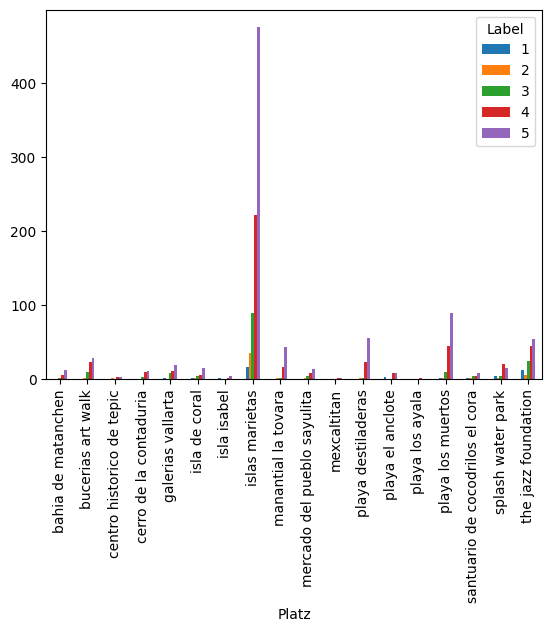

In [338]:
recomendacion = df_union.groupby(['Platz','Label']).Label.count().unstack()
recomendacion.plot(kind="bar")

<AxesSubplot: xlabel='Etiqueta'>

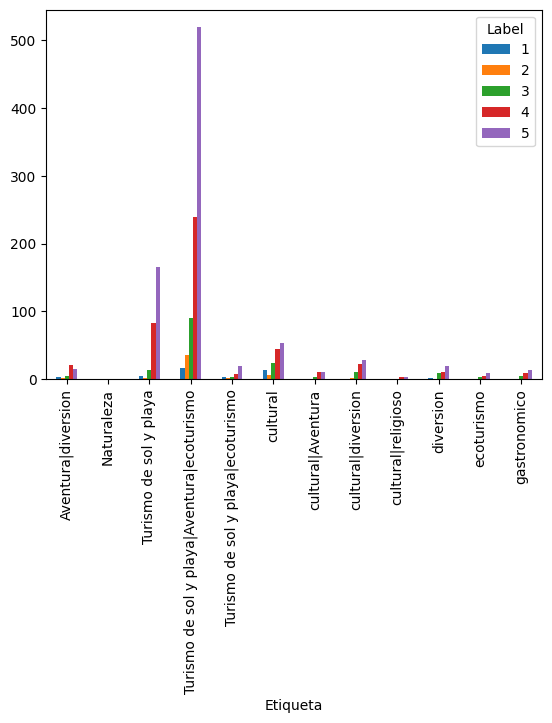

In [339]:
recomendacion = df_union.groupby(['Etiqueta','Label']).Label.count().unstack()
recomendacion.plot(kind="bar")

<AxesSubplot: xlabel='Flag'>

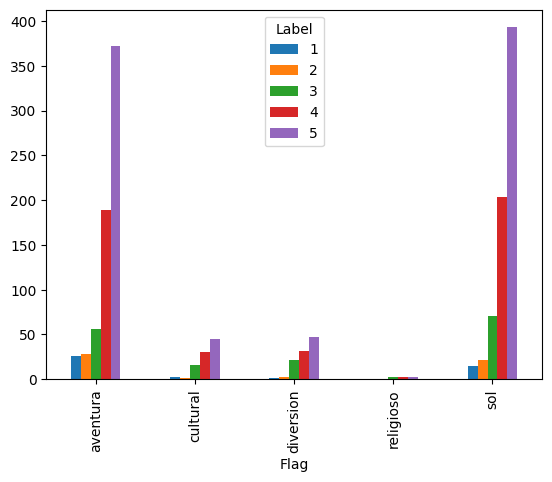

In [341]:
recomendacion = df_union.groupby(['Flag','Label']).Label.count().unstack()
recomendacion.plot(kind="bar")

<AxesSubplot: xlabel='Location'>

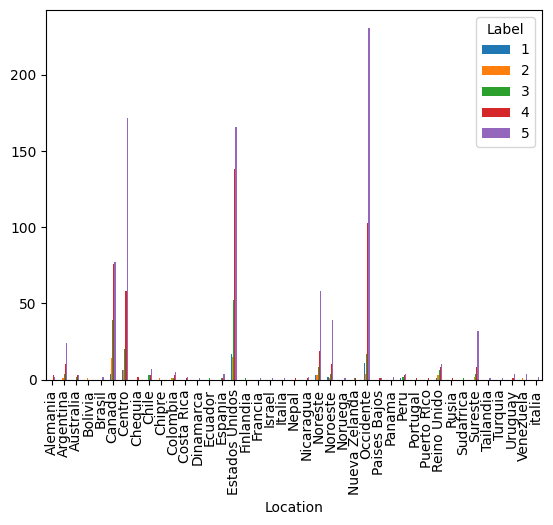

In [342]:
recomendacion = df_union.groupby(['Location','Label']).Label.count().unstack()
recomendacion.plot(kind="bar")

### EL KERNEL :c

#### Exportar Data Final

In [343]:
ruta = './result/'

In [344]:
df_union.to_csv(ruta+'concatData_noindex_utf8.csv',index=False, encoding='utf-8')

#### Recontinuar desde archivo de salvada 

Esto se hace una vez la maquina donde se desarrolla el ejericio presenta "cansancio" y debemos reiniciar el kernel y para no perder todo lo que hemos hecho y ejecutar cada celda hecha hasta el momento, se puede solo cargar la data donde ivamos

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from IPython.display import Image
import matplotlib.pyplot as plt
import plotly.express as px
mother_route = "./result/"
df_union = pd.read_csv(mother_route+'concatData_noindex_utf8.csv')
df_union.head(1)

,User,Gender,Location,Date,Type,Label,Code,Platz,Etiqueta,Stamp,Flag
0,Usuario0,Male,Alemania,abril de 2017,Couple,5,0.0,playa los muertos,Turismo de sol y playa,"['', '', 'sol', '', '']",sol


### Seguimos con graficos

In [346]:
df_union.head(1)

,User,Gender,Location,Date,Type,Label,Code,Platz,Etiqueta,Stamp,Flag
0,Usuario0,Male,Alemania,abril de 2017,Couple,5,0.0,playa los muertos,Turismo de sol y playa,"['', '', 'sol', '', '']",sol


<AxesSubplot: xlabel='User'>

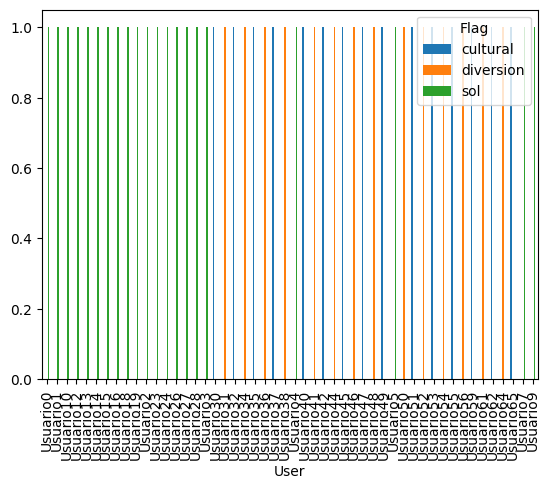

In [350]:
x = df_union['User'].head(50)
y = df_union['Flag'].head(50)
recomendacion = df_union.groupby([x,y]).Flag.count().unstack()
recomendacion.plot(kind="bar")

Observando los diferentes graficos podemos observar que podriamos recomendar a un usuario dependiento la 'Etiqueta' o en su defecto 'Flag' al agrupar usuarios por estos rasgos parecidos entre si.

Al mismo tiempo se podria estimar un agrupamiento entre los sitios marcados con las 'Etiqueta' y/o 'Flag' con el nivel de satisfaccion 'Label'.

In [3]:
#Nota: iba en la ejecucion de celda 350 y toco reiniciar alv

## SVM 

Si bien podemos comparar directamente con el etiquetado que nosotros hicimos a lo largo de este codigo, el agrupamiento de los usuarios ...
Para hacer esto debemos re-preparar las etiquetas en un modelo numerico con el cual trabajar en Machine Learning y aun asi quiza no tendremos la misma fiabilidad que las etiquetas de satisfaccion entregadas por el dataset 1 'Label'.

Con afanes de seguir con el ejercicio y siendo las 2:00 am, el entrenamiento de agrupacion se realizara con los 'Labels'.

In [26]:
df_union.dtypes

User         object
Gender       object
Location     object
Date         object
Type         object
Label         int64
Code        float64
Platz        object
Etiqueta     object
Stamp        object
Flag         object
dtype: object

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import pickle

In [4]:
df_union.keys()

Index(['User', 'Gender', 'Location', 'Date', 'Type', 'Label', 'Code', 'Platz',
       'Etiqueta', 'Stamp', 'Flag'],
      dtype='object')

In [51]:
#    [0],   [1],       [2],      [3],    [4],    [5],     [6],    [7],      [8]    ,   [9]     [10]
#'User', 'Gender', 'Location', 'Date', 'Type', 'Label', 'Code', 'Platz', 'Etiqueta', 'Stamp', 'Flag'

In [78]:
features = df_union.iloc[:,0].values # Users Code
labels   = df_union.iloc[:,5].values # Label

In [79]:
import re
# Limpiar el dataset de todos los caracteres especiales.
processed_features = []

for sentence in range(0, len(features)):
    #Remove all the special characters
    processed_feature = re.sub(r'\W',' ', str(features[sentence]))
    #remove all single characters
    processed_feature = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    #remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)
    #substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
    #removing prefixxed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    #converting to lowercase
    processed_feature = processed_feature.lower()
    #añadirlo al arreglo alv
    processed_features.append(processed_feature)

In [55]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.5/1.5 MB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 78.5/78.5 kB 4.3 MB/s eta 0:00:00
     -------------------------------------- 267.7/267.7 kB 8.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
# Importar STOPWORDS
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\Ruiso Local
[nltk_data]     Pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [81]:
vectorizer = TfidfVectorizer (max_features=2500, 
                              
                             stop_words=stopwords.words('spanish'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [82]:
x = processed_features
y = labels

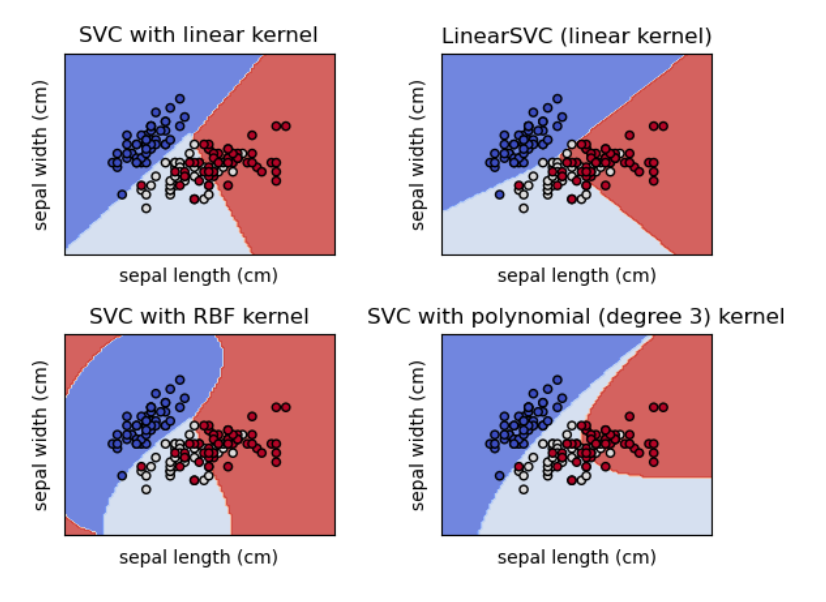

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import random

In [83]:
semilla = random.randint(0,100)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = semilla, stratify=y)
print(semilla)

49


#### Polynomial Kernel SVM

In [13]:
from sklearn.svm import SVC

In [85]:
clf = SVC(kernel='poly').fit(X_train, y_train)

In [86]:
print(clf.score(X_test, y_test))

0.5425867507886435


In [87]:
predictions = (clf.predict(X_test))

In [88]:
print(confusion_matrix(y_test, predictions))

[[  0   0   0   0   9]
 [  0   0   0   0  11]
 [  0   0   0   0  33]
 [  0   0   0   0  92]
 [  0   0   0   0 172]]


In [89]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        33
           4       0.00      0.00      0.00        92
           5       0.54      1.00      0.70       172

    accuracy                           0.54       317
   macro avg       0.11      0.20      0.14       317
weighted avg       0.29      0.54      0.38       317



C:\Users\Ruiso Local Pc\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ruiso Local Pc\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ruiso Local Pc\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [90]:
print(accuracy_score(y_test, predictions))

0.5425867507886435


#### Linear Kernel SVM

In [91]:
clf = SVC(kernel='linear').fit(X_train, y_train)

In [92]:
print(clf.score(X_test, y_test))

0.5425867507886435


In [93]:
predictions = (clf.predict(X_test))

In [94]:
print(confusion_matrix(y_test, predictions))

[[  0   0   0   0   9]
 [  0   0   0   0  11]
 [  0   0   0   0  33]
 [  0   0   0   0  92]
 [  0   0   0   0 172]]


In [95]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        33
           4       0.00      0.00      0.00        92
           5       0.54      1.00      0.70       172

    accuracy                           0.54       317
   macro avg       0.11      0.20      0.14       317
weighted avg       0.29      0.54      0.38       317



C:\Users\Ruiso Local Pc\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ruiso Local Pc\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ruiso Local Pc\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

#### RBF Kernel SVM

In [96]:
clf = SVC(kernel='rbf').fit(X_train, y_train)

In [97]:
print(clf.score(X_test, y_test))

0.5425867507886435


In [98]:
predictions = (clf.predict(X_test))

In [99]:
print(confusion_matrix(y_test, predictions))

[[  0   0   0   0   9]
 [  0   0   0   0  11]
 [  0   0   0   0  33]
 [  0   0   0   0  92]
 [  0   0   0   0 172]]


In [100]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        33
           4       0.00      0.00      0.00        92
           5       0.54      1.00      0.70       172

    accuracy                           0.54       317
   macro avg       0.11      0.20      0.14       317
weighted avg       0.29      0.54      0.38       317



C:\Users\Ruiso Local Pc\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ruiso Local Pc\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ruiso Local Pc\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

#### Sigmoidal Kernel SVM

In [101]:
clf = SVC(kernel='sigmoid').fit(X_train, y_train)

In [102]:
print(clf.score(X_test, y_test))

0.5425867507886435


In [103]:
predictions = (clf.predict(X_test))

In [104]:
print(confusion_matrix(y_test, predictions))

[[  0   0   0   0   9]
 [  0   0   0   0  11]
 [  0   0   0   0  33]
 [  0   0   0   0  92]
 [  0   0   0   0 172]]


In [105]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        33
           4       0.00      0.00      0.00        92
           5       0.54      1.00      0.70       172

    accuracy                           0.54       317
   macro avg       0.11      0.20      0.14       317
weighted avg       0.29      0.54      0.38       317



C:\Users\Ruiso Local Pc\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ruiso Local Pc\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ruiso Local Pc\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

## CONCLUSIONES

Como se pudo observar con la implementacion de agrupacion con el algoritmo SVM de Machine Learning, si bien es posible agrupar diferentes usuarios por sus gustos y puntuaciones de los lugares que ha visitado, podiendo recomendar sitios turisticos entre usuarios de una misma agrupacion ... la implementacion de SVM nos demuestra que es necesario el examen de etiquetas individuales para realmemte aconsejar a un cliente sobre un destino turistico como lo es el proceso del coseno de similitud.

La implementacion del algoritmo SVM nos arroja un agrupamiento de usuarios con tendencias de prediccion iguales a lanzar una moneda al aire, esto es debido a la falta de caracterizacion individual de las etiquetas, puesto que SVM trabaja con columnas del dataframe individuales.

Una forma en la que se podria utilizar diferentes etiquetas para la agrupacion de usuarios podria ser con el Algoritmo de K-means, donde se nos permite dar (n) parametros de entrada con la finalidad de halla runa correlacion que demuestre una tendencia la cual podemos analizar y estractar resultados, sin embargo el coste computacional es muy alto para desarrollarlo en este ejercicio.

En caso de la implementacion de K-means y poder observar el nivel de correlacion de diferentes etiquetas individuales con los sitios turisticos visitados por los usuarios, se pueden preparar diferentes columnas que alvergen estas etiquetas haciendo un juego entre la funcion "append" de las operaciones con dataframes y el posicionamiento de (x,y) que brinda la funcion "at". tambien podria hacerce con las operaciones basicas de generacion de corpus individuales coherentes que respeten la inmutabilidad del orden y tamaño de los datos y la agregacion de columnas nuevas a partir de listas.

Como veremos en este notebook a continuacion, tambien se intento trabajar con el 3 dataset, sin embargo por los tiempos de entrega de este ejercicio que fueron invadidos por otras cargas academicas, se prefirio trabajar solo con los dos primeros datasets.

El tercer dataset sin embargo puede prindar de una mayor variedad y riqueza en el etiquetado, caracteristica crucial en el momento de distinguir, agrupar y recomendar sitios comunes entre los turistas. Para esto la idea general del tratamiento de datos seria lo siguiente:
1. la de leer set por set de datos correspondiente a cada usuario.
2. añadir una nueva columna que identifique cada fila de comentarios con su usurio respectivo
3. sumar las opiniones de los turistas en una unica fila.
4. promediar las puntuaciones en una unica fila.
5. sumar toda la informacion a un nuevo dataframe vacio.
De esta manera se tendria un dataframe cuyas filas serian unicas por usuario, 4 columnas pertenecientes a la lectura de datos y 1 agregada que identifica la fila con un usuario especifico. Luego de esto se podria:
1. limpiar las columnas de comentarios
2. eliminar stopwords de las columnas de comentarios
3. diversificar columnas segun el numero de etiquetas comunes, esto se puede hacer con vistasos a los contadores de palabras comunes entre filas.
4. agregar esta informacion con un Merge aprovechando la columna de identificacion de usuario, esto hecho una vez la misma se transforme a minusculas para coincidir con los otros dataframes.
En ese momento el dataframe a analizar queda con mayor riqueza de informacion de etiquetas con las cuales poder comparar los gustos de turismo de las personas. Sin embargo en este punto es claro que se genera una matriz de lectura propia de los algoritmos de sistemas de recomendacion, por lo que si la maquina donde se ejecuta este notebook lo permite, se sugiere realizar este ejercicio con coseno de similitud en vez de los algoritmos clasicos de Machine Learning

## Dataset 3 (Folder Users Training)

Observando el contenido de la carpeta Users Training podemos constatar de vistaso rapido que muy posiblemente podemos construir un dataframe a partir de la union vertical de los usuarios y hacer un Merge con e dataset 1 con la columna [Index].

Observemos primero que es lo que trae un solo usuario.

In [20]:
test_user = './Data/Data/data_Training/UsersTraining/Usuario0.csv'
df_san = pd.read_csv(test_user)
df_san.head(8)

,"La playa, sencillamente es hermosa, mis hijos y yo verdaderamente disfrutamos este lugar... Primero tenía cierto temor por lo qie había escuchado del lugar, per...",4.0,Sayulita Beach,4.0.1
0,Hermoso lugar... Aunque muy fría el agua... Mu...,4.0,Balneario Agua Fría,4.0
1,La cerdad vale la pena visitar eate lugar... C...,4.0,Los Molcajetes de Villa,4.5
2,"Debes visitar ""La Casa de Piedra"", ambiente mu...",4.0,La Casa de Piedra,4.0
3,Hola amig@s... Este es realmente un buen lugar...,4.0,Zoológico Guadalajara,4.5
4,Es un lugar muy tradicional en Mazatlán... exc...,4.0,El Muchacho Alegre,4.0
5,La verdad es que tienes una vista increíble de...,4.0,Malecón de Mazalán,4.5
6,"Si buscas una opción económica, seguro, en la ...",4.0,Hotel Fontan Ixtapa,4.0
7,Sinceramente no conozco una ciudad tan limpia ...,5.0,Colima Capital,4.0


Como podemos observar, esta es una sucesion de puntuaciones y comentarios de los turistas , sin embargo no hay un titulo o nombre de columna por cada uno, por lo que deberemos de crear cada nombre de columna y luego consecutivamente añadir los datos de cada usuario

In [21]:
df_san.shape

(19, 4)

Aqui el problema yace en como tomar esta informacion para cada usuario, puesto que no es a simple vista algo que poner en merge con los anteriores datasets

Las utilidadesde las columnas son las siguientes:


1. Columna 1: El comentario que el turista otorgó (desconocido = comentario en blanco)
2. Columna 2: El nivel de satisfacción que tuvo el UsuarioN
3. Columna 3: El lugar que el turista visitó (Este lugar puede ser de cualquier parte del mundo, no necesariamente de México)
4. Columna 4: La calificación global que tiene ese lugar en el sitio TripAdvisor


In [100]:
df_san = pd.DataFrame()

df_san['Comentario Turista'] = None
df_san['Satisfaccion'] = None
df_san['Sitio Visitado'] = None
df_san['Calificacion Global'] = None


In [101]:
route_folder = './Data/Data/data_Training/UsersTraining/'
test_user = 'Usuario'

for i in range(64):
    
    the_route = str(route_folder + test_user + str(i) + '.csv')
    
    if os.path.isfile(the_route) == True:
        df_temp = pd.read_csv(the_route)
    
        df_temp = df_temp.rename( columns={df_temp.keys()[0]:'Comentario Turista'} )
        df_temp = df_temp.rename( columns={df_temp.keys()[1]:'Satisfaccion'} )
        df_temp = df_temp.rename( columns={df_temp.keys()[2]:'Sitio Visitado'} )
        df_temp = df_temp.rename( columns={df_temp.keys()[3]:'Calificacion Global'} )

        df_san = df_san.append( df_temp , ignore_index=True )

        array_usuario = []
        for i in range(df_temp.shape[0]):
            array_usuario.append(str(test_user + str(i)))

        df_san['User'] = array_usuario
        array_usuario.clear()
        
        array_code = []
        for i in range(df_temp.shape[0]):
            array_code.append(i)
        
        df_san['Code'] = array_code
        array_code.clear()
    else:
        print("El archivo ", the_route, " NO SE ENCONTRO")
    
df_san.head()

C:\Users\Ruiso Local Pc\AppData\Local\Temp\ipykernel_22600\2160929699.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_san = df_san.append( df_temp , ignore_index=True )
C:\Users\Ruiso Local Pc\AppData\Local\Temp\ipykernel_22600\2160929699.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_san = df_san.append( df_temp , ignore_index=True )


ValueError: Length of values (25) does not match length of index (44)

In [99]:
df_san.shape

(1774, 5)